In [16]:
import numpy as np
from matplotlib import pyplot as plt
from DS_Planck_Unet import unet_planck, test_pix, gen_data, check_mask
from DS_data_transformation import pic2fits
from DS_healpix_fragmentation import *
from DS_detector import clusters_in_pix
import pandas as pd

In [2]:
model = unet_planck(weights='/home/rt2122/Models/planck_z/model.ep300.h5')

In [3]:
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                    min_rad=0.08)

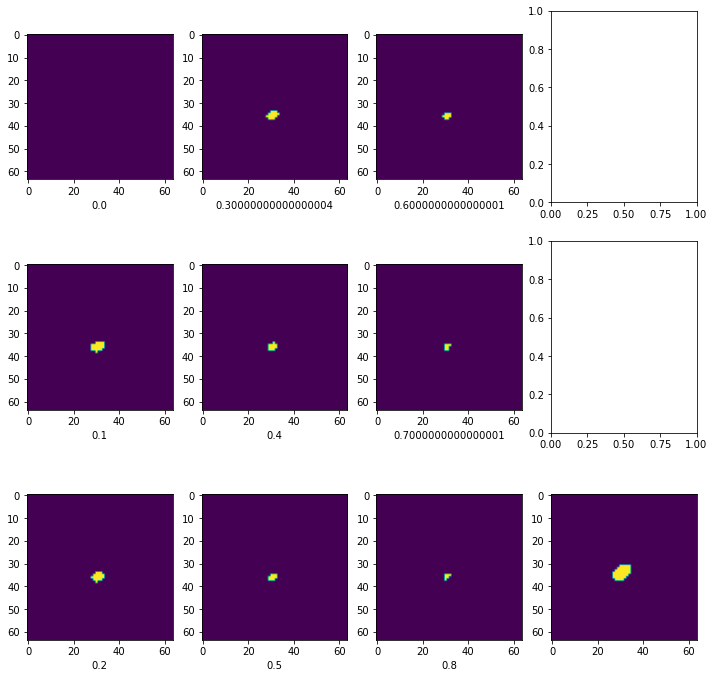

In [5]:
check_mask(test_gen, model, [0.1 * i for i in range(9)])

In [7]:
pic, mask = next(test_gen)

In [8]:
ans = model.predict(pic)

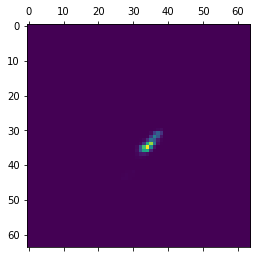

In [9]:
plt.matshow(ans[0,:,:,0])

In [10]:
pic2fits(ans[0], None, '/home/rt2122/Data/mask.fits')

In [12]:
big_matr = one_pixel_fragmentation(2, 6, 10)

In [13]:
big_mdict = matr2dict(big_matr)

In [15]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [17]:
planck_z = clusters_in_pix('/home/rt2122/Data/clusters/planck_z.csv', 6, 2)

In [18]:
pic = draw_circles_h(planck_z['RA'], planck_z['DEC'], np.ones(planck_z.shape[0]),
                    2048, big_mdict, big_matr.shape)

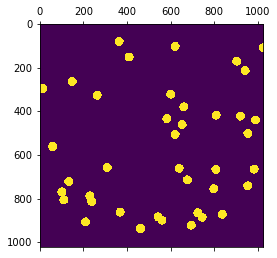

In [19]:
plt.matshow(pic)